In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson 

sys.path.append(os.path.abspath("../src"))

os.makedirs("figures", exist_ok=True)

L = 10.0
N = 129  
dx = L / N
x = np.linspace(-L / 2, L / 2, N, endpoint=False)

alpha = 1.0
dt = 0.001
steps = 500

In [2]:
def gaussian_bump(x, center=0.0, width=0.5, amplitude=1.0):
    return amplitude * np.exp(-((x - center) ** 2) / (2 * width ** 2))

u0 = gaussian_bump(x, center=0.0, width=0.5)

In [3]:
from numerics.laplacian_1d import make_laplacian_1d
from pdes.heat_solver_1d import run_heat_solver_1d

laplacian = make_laplacian_1d(N, dx)
u_history = run_heat_solver_1d(u0, laplacian, alpha, dt, steps)

In [4]:
from utils.diagnostics import compute_l2_error

u_ref = u0.copy()
l2_error = compute_l2_error(u_history[-1], u_ref, dx)

print(f"L² Error vs u₀: {l2_error:.6e}")

L² Error vs u₀: 5.091487e-01


In [5]:
u_ref = u0.copy()
l2_error = np.sqrt(simpson((u_history[-1] - u_ref)**2, x))
print(f"L² error vs initial: {l2_error:.6e}")

L² error vs initial: 5.091487e-01


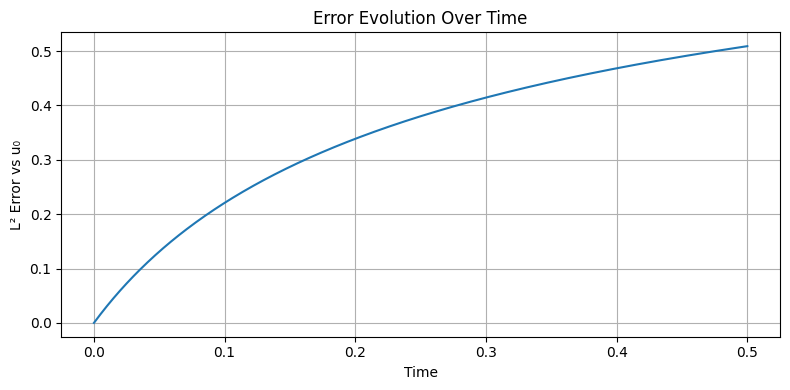

In [6]:
errors = [
    compute_l2_error(u, u0, dx)
    for u in u_history
]

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(errors)) * dt, errors)
plt.xlabel("Time")
plt.ylabel("L² Error vs u₀")
plt.title("Error Evolution Over Time")
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/error_evolution.png", dpi=300)
plt.show()

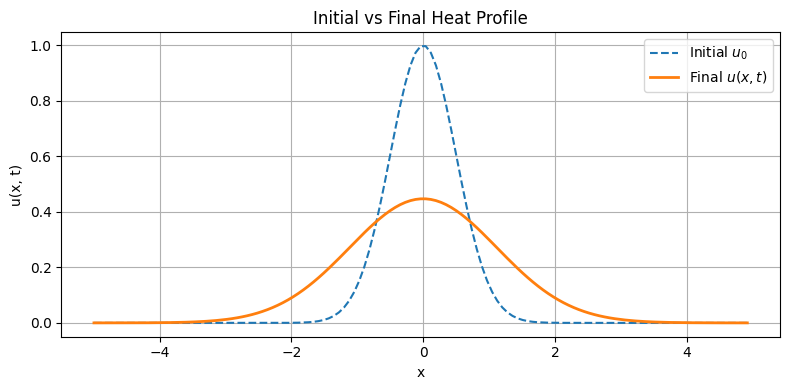

In [7]:
from visualization.plotting_1d import plot_initial_final

plot_initial_final(x, u0, u_history[-1])

In [8]:
from visualization.animation_1d import animate_heat_solution

animate_heat_solution(x, u_history, dt=dt)

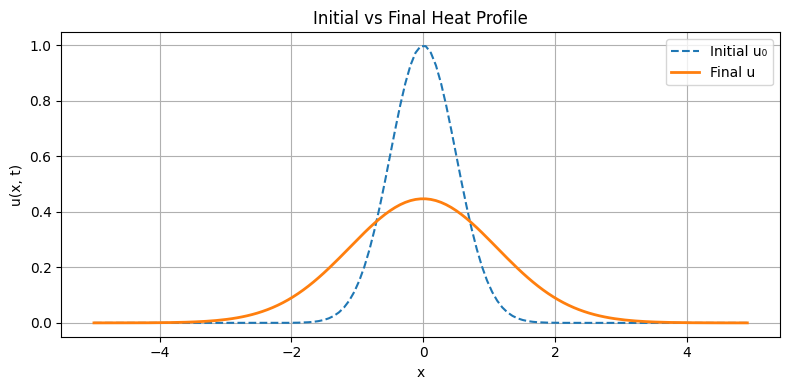

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(x, u0, label="Initial u₀", linestyle="--")
plt.plot(x, u_history[-1], label="Final u", linewidth=2)
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Initial vs Final Heat Profile")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/final_comparison.png", dpi=300)
plt.show()